# KNN(k-nearest neighbor) 算法：
- 算法思想：假设给定一个训练数据集，其中的实例类别已定，预测时，根据其K个最近邻的训练实例的类别，通过多数表决的方式进行预测。
- K近邻法不具有显式的学习过程。
- K近邻法的三个基本要素：K值的选择，距离度量，分类决策规则
- K值的选择：K值一般选较小的值，可以通过CV选择最优的K；
- 距离度量：Python中：
  - p = 1 曼哈顿距离 即绝对数之和
  - p = 2 欧氏距离 即平方和开方
  - p = inf  闵式距离minkowski_distance (p为变参数）
- 分类决策规则
多数表决规则：损失函数为（0-1）损失函数时，使sum(I(y=c))最大，等价于经验风险最小化。

- 简单KNN分类具体算法:
  - 1. 归一化处理数据；
  - 2. 数据集分成训练和测试，其中用训练样本进行交叉验证，选择最优的K；
  - 3. 计算测试集和训练样本之间的距离，根据K判断每一个测试样本的预测分类；
  - 4. 将测试集中的预测分类和实际分类进行对照，计算测试样本的分类准确率。

- kd树搜索最近邻:
  - 目的：当训练集很大时，计算输入实例与每一个训练实例的距离，计算量很大而且耗时，kd树通过对k维空间进行切分以便快速检索最近邻的树形数据结构。
  - 思想：根据构造好的kd树，给定一个目标点，首先找到包含目标点的叶结点，以此叶结点的实例点作为当前最近点，目标点的最近邻一定是在以目标点为中心并通过当前最近点的超球体的内部。然后返回当前结点的父节点，如果父节点的另一子结点的超矩形区域与超球体相交，那么在相交区域内寻找与目标点更近的实例，如果存在这样的点，将此点作为新的当前最近点。算法转到更上一级的父结点，重复之前过程；如果不想交，则停止搜索。
  - 算法：
  - 1.构造kd树；
  - 2.在kd树中找出目标点的叶节点，以此叶节点为“当前最近点”；
  - 3.递归地向上回退，在每个节点进行操作：
    检查该子节点的父结点的另一子节点是否有更近的点。具体地，检查另一子节点对应的区域是否与超球体相交；如果相交，在该区域寻找距目标点更近的点，接着，递归地进行搜索；
    如果不相交，向上回退。
- 构造平衡kd树：（以中位数为切分点，得到的kd树时平衡的，但是未必最优）
 - 1.构造根节点，包含所有实例。选择x(1)为坐标轴，以所有实例的x(1)的中位数为切分点，将根节点对应的超矩形区域划分为两个子区域。将落在超平面上的点保存在根节点。
 - 2.重复上面过程，选择x(2)作为坐标轴，以所有实例的x(2)的中位数为切分点，将该节点对应的超矩形区域划分为两个子区域。将落在切分超平面上的点保存在该节点。
 - 3.直到两个子区域没有实例存在时停止。
 


# 数据获取-系统内部数据鸢尾花

### sklearn的自带数据
load_boston([return_X_y]) 加载波士顿房价数据；用于回归问题 load_iris([return_X_y]) 加载iris 数据集；用于分类问题 load_diabetes([return_X_y]) 加载糖尿病数据集；用于回归问题 load_digits([n_class, return_X_y]) 加载手写字符集；用于分类问题 load_linnerud([return_X_y]) 加载linnerud 数据集；用于多元回归问题



In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sns

### 加载数据

In [3]:
iris = datasets.load_iris()

In [4]:
iris_array = np.concatenate((iris['data'],iris['target'].reshape(150,1)),axis = 1) #改变iris['target']的shape

In [5]:
iris = pd.DataFrame(iris_array,columns =['sepal length','sepal width','petal length','petal width','target']) 
#特征分别为：花萼长度，花萼宽度，花瓣长度，花瓣宽度 target 共有三个品种
iris['target']=iris['target'].astype('int')
iris.head()
iris.to_csv('E:\\AnalystPersonal\\chenxiaoyan\\suanfa\\iris.csv',index = False) #读取出去，用sas进行分析

### 认识数据

In [6]:

iris.shape
iris.describe()

,sepal length,sepal width,petal length,petal width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
default = iris.groupby(by = 'target') #共有三类
default.groups

{0: Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
             17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
             34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
            dtype='int64'),
 1: Int64Index([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
             67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
             84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
            dtype='int64'),
 2: Int64Index([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
             113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
             126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
             139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149],
            dtype='int64')}

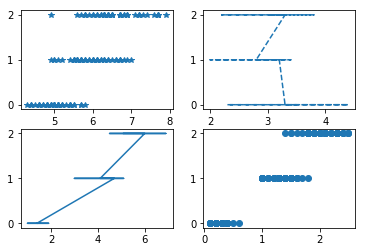

In [8]:
#target 跟 每个变量之间的散点图
plt.subplot(2,2,1)
plt.plot(iris['sepal length'],iris['target'],'*')
plt.subplot(2,2,2)
plt.plot(iris['sepal width'],iris['target'],'--')
plt.subplot(2,2,3)
plt.plot(iris['petal length'],iris['target'],'-')
plt.subplot(2,2,4)
plt.plot(iris['petal width'],iris['target'],'o')

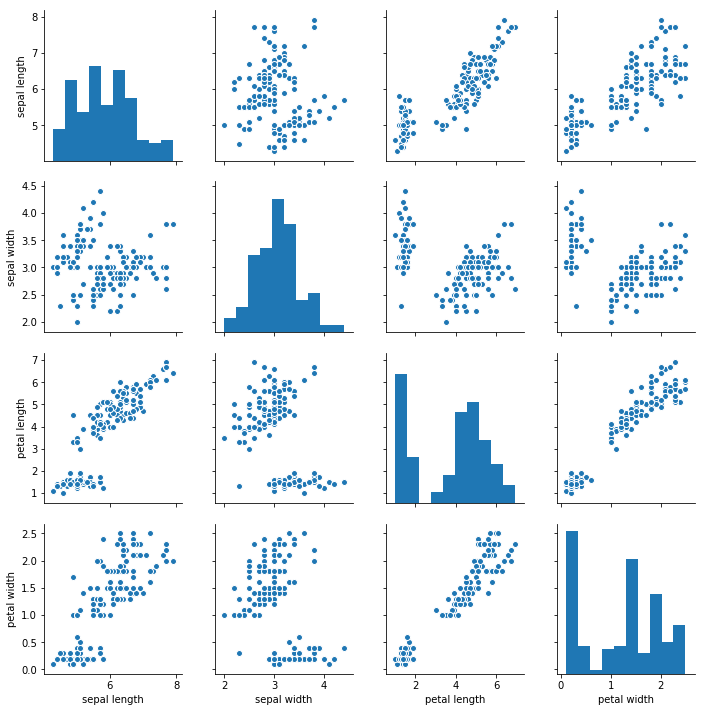

In [9]:
# 四个特征之间的散点图矩阵
sns.pairplot(iris.iloc[:,:4])

### 数据处理 - 归一化

In [10]:
iris = pd.DataFrame(iris_array,columns =['sepal length','sepal width','petal length','petal width','target']) 
#特征分别为：花萼长度，花萼宽度，花瓣长度，花瓣宽度 target 共有三个品种
iris['target']=iris['target'].astype('int')
iris.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
a = iris.columns.drop('target')
for col in iris.columns.drop('target'):
    x = iris[col]
    max = x.max()
    min = x.min()
    iris[col+'_z'] = (x-x.max())/(x.max()-x.min())
iris = iris.drop(a,axis = 1)

In [12]:
iris.head()

,target,sepal length_z,sepal width_z,petal length_z,petal width_z
0,0,-0.777778,-0.375000,-0.932203,-0.958333
1,0,-0.833333,-0.583333,-0.932203,-0.958333
2,0,-0.888889,-0.500000,-0.949153,-0.958333
3,0,-0.916667,-0.541667,-0.915254,-0.958333
4,0,-0.805556,-0.333333,-0.932203,-0.958333


In [13]:
iris_X = iris.iloc[:,1:5]
iris_Y = iris.iloc[:,0]
print(iris_X,iris_Y)

     sepal length_z  sepal width_z  petal length_z  petal width_z
0         -0.777778      -0.375000       -0.932203      -0.958333
1         -0.833333      -0.583333       -0.932203      -0.958333
2         -0.888889      -0.500000       -0.949153      -0.958333
3         -0.916667      -0.541667       -0.915254      -0.958333
4         -0.805556      -0.333333       -0.932203      -0.958333
5         -0.694444      -0.208333       -0.881356      -0.875000
6         -0.916667      -0.416667       -0.932203      -0.916667
7         -0.805556      -0.416667       -0.915254      -0.958333
8         -0.972222      -0.625000       -0.932203      -0.958333
9         -0.833333      -0.541667       -0.915254      -1.000000
10        -0.694444      -0.291667       -0.915254      -0.958333
11        -0.861111      -0.416667       -0.898305      -0.958333
12        -0.861111      -0.583333       -0.932203      -1.000000
13        -1.000000      -0.583333       -0.983051      -1.000000
14        

### 交叉验证拆分数据 — 分层K折交叉验证

In [14]:
import numpy as np 
from sklearn.model_selection import KFold,StratifiedKFold

#### 利用StratifiedKFold函数

In [15]:
train_cv = []
test_cv = []
sfolder = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) # shuffle-True/False 每次拆分数据之前是否重新打乱顺序 
                                                                   #random_state表示随机数种子，设置同一个整数，结果一样，设置不同整数，结果不同，默认不设置时，会随机选取
for train, test in sfolder.split(iris_X,iris_Y): #通过split 产生的数据集时原数据集的索引
    train_cv.append(train)
    test_cv.append(test)
   # print('Train: %s | test: %s' % (train_cv, test_cv))
   # print(" ")
#print(train_cv)


#### KFold 和 StratifiedKFold的区别在于，一个是分层K折，一个是y随机分K折

In [14]:
floder = KFold(n_splits=5,random_state=1,shuffle=False)
for train, test in sfolder.split(iris_X,iris_Y): #通过split 产生的数据集时原数据集的索引
    train_cv.append(train)
    test_cv.append(test)
   # print('Train: %s | test: %s' % (train_cv, test_cv))
   # print(" ")
#print(train_cv)

#### 利用StratifiedShuffleSplit函数

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
fold=StratifiedShuffleSplit(n_splits=5,test_size=0.2,random_state=1)#分成5组，测试比例为0.2，训练比例是0.8
train_cv=[]
test_cv = []
for train_index, test_index in fold.split(iris_X,iris_Y):
    train_cv.append(train_index)
    test_cv.append(test_index)

##### 计算欧式距离

In [16]:
train_cv1 = iris.iloc[train_cv[4],:]
test_cv1 = iris.iloc[test_cv[4],:]
train_target = train_cv1[[ 'target']]
test_target = test_cv1[['target']]
test_target = test_target.reset_index(drop = True)
test_cv1

,target,sepal length_z,sepal width_z,petal length_z,petal width_z
0,0,-0.777778,-0.375000,-0.932203,-0.958333
5,0,-0.694444,-0.208333,-0.881356,-0.875000
8,0,-0.972222,-0.625000,-0.932203,-0.958333
9,0,-0.833333,-0.541667,-0.915254,-1.000000
11,0,-0.861111,-0.416667,-0.898305,-0.958333
12,0,-0.861111,-0.583333,-0.932203,-1.000000
15,0,-0.611111,0.000000,-0.915254,-0.875000
16,0,-0.694444,-0.208333,-0.949153,-0.875000
37,0,-0.833333,-0.541667,-0.915254,-1.000000
43,0,-0.805556,-0.375000,-0.898305,-0.791667


In [386]:
#train_cv1['dist1']= np.sqrt(np.sum(np.square(test_cv1.iloc[0,1:5]-train_cv1.iloc[:,1:5]),axis = 1)) #第一个test样本与train所有样本的距离
#train_cv1['dist'] = np.linalg.norm(test_cv1.iloc[0,1:5]-train_cv1.iloc[:,1:5],axis = 1)

In [17]:
# 循环- 计算第一折数据test中的每个样本与train中每个样本的距离；然后分别对每一个test样本距离排序，
#统计每一个样本预测的类，将所有样本的类统计为一个列表，为target_yc,并与test原始target进行比较，得出误差率
error_lv = []
#target_yc = []
for k in range(1,len(train_cv1)): #邻居个数的选择
    target_yc = []
    for n in range(0,len(test_cv1)):
        train_target['distance']= np.sqrt(np.sum(np.square(test_cv1.iloc[n,1:5]-train_cv1.iloc[:,1:5]),axis = 1)) #第一个test样本与train所有样本的距离
        dist_sort = train_target.sort_values(by = 'distance') #距离排序
        count = pd.DataFrame(dist_sort['target'].head(k).value_counts()) #计算在前K个距离中每个类的个数
        max = count['target'].max() #计算前K个距离中每个类的数量
        target_yc1 = [count[count.target == max].index.tolist()[0]] #target_yc1为预测的每一个test样本的类
        #target_yc1 = count[count.target == max].index.tolist()
        target_yc.append(target_yc1)#target_yc为预测所有test样本的类
    target_yc = pd.DataFrame(target_yc,columns = None) #将list转为dataframe格式
    #train_cv1['id'] = np.arange(1,train_cv1.shape[0] + 1)
    target_yc = target_yc.rename(columns = {0:'target_yc'})#修改列名
    error = pd.concat([target_yc,test_target],axis = 1)#将原始数据和预测的合并
    error['error'] = np.nan                            #增加一列error，初始值设置为缺失
    
    
    for i,j,z in zip(error['target_yc'],error['target'],range(0,len(error))): 
        if i == j:
            error['error'][z] = 0
        else:
            error['error'][z] = 1
    error_lv1 = sum(error['error']==1)/len(error) #计算每一个K下的误差率
    error_lv.append(error_lv1)
    #error_type = error['error'+str(k)].astype(dtype = 'int32')
    #error['error'+str(k)] = error_type
#print(error_lv)

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [201]:
target_yc

,target_yc
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


# 利用Python自带函数封装包来实现

In [155]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [156]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

In [157]:
# 利用train_test_split进行训练集和测试机进行分开，test_size占30%
X_train,X_test,y_train,y_test=train_test_split(iris_X,iris_y,test_size=0.2,stratify = iris_y) # stratify 按照类比例进行分割
X_train

array([[4.9, 3. , 1.4, 0.2],
       [6.1, 2.8, 4. , 1.3],
       [6.9, 3.2, 5.7, 2.3],
       [4.8, 3.1, 1.6, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [6.3, 3.3, 4.7, 1.6],
       [5.9, 3. , 4.2, 1.5],
       [6. , 2.7, 5.1, 1.6],
       [4.6, 3.6, 1. , 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [5.4, 3.7, 1.5, 0.2],
       [6.4, 3.2, 5.3, 2.3],
       [4.8, 3.4, 1.9, 0.2],
       [4.6, 3.2, 1.4, 0.2],
       [5.5, 4.2, 1.4, 0.2],
       [6.7, 3. , 5. , 1.7],
       [5.7, 3. , 4.2, 1.2],
       [4.4, 2.9, 1.4, 0.2],
       [5.1, 3.8, 1.6, 0.2],
       [4.9, 2.5, 4.5, 1.7],
       [5.8, 2.8, 5.1, 2.4],
       [5.5, 2.3, 4. , 1.3],
       [7.1, 3. , 5.9, 2.1],
       [6.3, 2.9, 5.6, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [6.7, 3. , 5.2, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [5. , 3.6, 1.4, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [5.2, 2.7, 3.9, 1.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.7, 4

### 可引入交叉验证选出误差率最小的K

In [176]:
knn = KNeighborsClassifier(n_neighbors = 100) #引入函数 n_neighbors通过交叉验证来确定
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform')

In [177]:
knn.fit(X_train,y_train)  #训练集训练模型

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform')

In [178]:
params = knn.get_params()

In [179]:
score = knn.score(X_test,y_test)
print("预测得分为：%s"%score)

预测得分为：0.6


In [429]:
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4],
              [1, 2],[3, 4], [1, 2], [3, 4]])#训练数据集8*2
y = np.array([0, 0, 1, 1,0,0,1,1])#类别数据集8*1

ss=StratifiedShuffleSplit(n_splits=5,test_size=0.25,train_size=0.75,random_state=0)#分成5组，测试比例为0.25，训练比例是0.75

for train_index, test_index in ss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)#获得索引值


TRAIN: [5 2 6 4 1 3] TEST: [7 0]
TRAIN: [4 3 5 2 7 1] TEST: [6 0]
TRAIN: [7 1 6 2 0 4] TEST: [5 3]
TRAIN: [3 6 4 7 0 5] TEST: [1 2]
TRAIN: [3 4 1 7 2 0] TEST: [6 5]


In [440]:
#X_train, X_test = X[train_index], X[test_index]#训练集对应的值
train_index  = list(train_index)
train_index

[5, 2, 6, 4, 1, 3]

In [455]:
train=[]
test = []
for train_index, test_index in ss.split(X, y):
    train.append(train_index)
    test.append(test_index)

In [457]:
train

[array([5, 2, 6, 4, 1, 3], dtype=int64),
 array([4, 3, 5, 2, 7, 1], dtype=int64),
 array([7, 1, 6, 2, 0, 4], dtype=int64),
 array([3, 6, 4, 7, 0, 5], dtype=int64),
 array([3, 4, 1, 7, 2, 0], dtype=int64)]

In [458]:
test

[array([7, 0], dtype=int64),
 array([6, 0], dtype=int64),
 array([5, 3], dtype=int64),
 array([1, 2], dtype=int64),
 array([6, 5], dtype=int64)]